## TASK-1

In [20]:
import keras
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.common.set_image_dim_ordering('th')
tbCallBack= keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0,write_graph=True, write_images=True)

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32,32,3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(output_dim=10, activation='softmax'))

# Compile model
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

# Fit the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=256, callbacks=[tbCallBack])
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_42 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_43 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 16, 16, 64)       

In [0]:
model.save('./model' + '.h5')

## TASK-2

In [24]:
import pandas as pd
prediction = pd.DataFrame()
imageid = []
for i in range(len(X_test[0:4])):
    i = i + 1
    imageid.append(i)
prediction["ImageId"] = imageid
prediction["Label"] = model.predict_classes(X_test[13:17], verbose=0)
print(prediction.head())

import numpy as np
a  = np.array(y_test[13:17])
print('Actual labels for four images: {0}'.format(np.argmax(a, axis=1)))


   ImageId  Label
0        1      7
1        2      9
2        3      8
3        4      5
Actual labels for first four images: [7 9 8 5]


## TASK-3

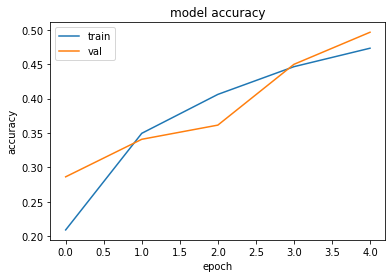

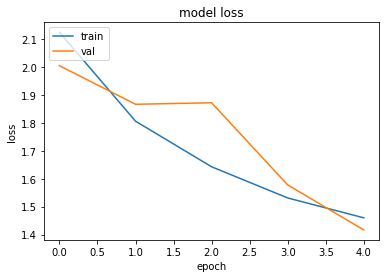

In [29]:
# Accuracy plot for train and validation datasets
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Loss plot for train and validation datasets
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## BONUS:

In [32]:
loaded_model = keras.models.load_model('./model.h5')
import pandas as pd
prediction = pd.DataFrame()
imageid = []
for i in range(len(X_test[0:4])):
    i = i + 1
    imageid.append(i)
prediction["ImageId"] = imageid
prediction["Label"] = loaded_model.predict_classes(X_test[13:17], verbose=0)
print(prediction.head())

import numpy as np
a  = np.array(y_test[13:17])
print('Actual labels for first four images: {0}'.format(np.argmax(a, axis=1)))

   ImageId  Label
0        1      7
1        2      9
2        3      8
3        4      5
Actual labels for first four images: [7 9 8 5]
